In [1]:
import os
import pickle
import matplotlib.pyplot as plt
from scipy.io import loadmat
import h5py
import pandas as pd
import numpy as np

In [2]:
def load_var_from_mat(mat_file_name, varname):

    try:
        data = loadmat(mat_file_name)

        var = data[varname]
    except:
        data = h5py.File(mat_file_name, 'r')

        var = data[varname][()]

    return var

In [3]:
pth_dat = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\8_27_24_stdev_color_features_python\xy_inds_mat\registered\mat_with_reg_coords\temp\liver_data.mat'

dat = pd.DataFrame(np.transpose(load_var_from_mat(pth_dat, 'data')))

In [4]:
dat.head()

,0,1,2,3,4,5
0,235.878494,58.166660,0.876093,37.278667,25.793718,41.066086
1,245.828568,56.708656,0.960602,44.744877,32.590477,46.874508
2,314.032898,64.389656,0.951815,49.553936,37.829819,52.116276
3,235.885269,56.215767,0.937982,44.368282,32.631447,45.881142
4,52.720142,28.593393,0.810317,22.543938,15.857747,22.722565


In [5]:
dat.shape

(59446, 6)

In [10]:
import umap
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [7]:
reducer = umap.UMAP()

In [8]:
scaled_dat = StandardScaler().fit_transform(dat)
embedding = reducer.fit_transform(scaled_dat)

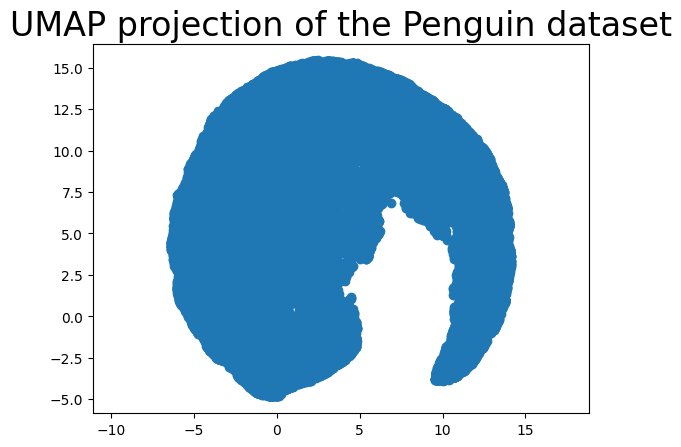

In [12]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);

In [13]:
sa

(59446, 2)

In [15]:
from scipy.io import savemat

savemat(r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\8_27_24_stdev_color_features_python\xy_inds_mat\registered\mat_with_reg_coords\temp\UMAP_data_liver.mat', {'embedding': embedding})